In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.metrics import accuracy_score , confusion_matrix 
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\Siddharth Bingi\\Documents\\Sabir ML\\Assignment 2\\sgemm_product_dataset\\sgemm_product.csv")

In [3]:
df["avg_run"] = df.iloc[:,14:].mean(axis = 1)

median_run = df['avg_run'].median()

df.loc[df['avg_run'] >= median_run, 'run_class'] = 1
df.loc[df['avg_run'] < median_run, 'run_class'] = 0

df.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)', 'avg_run'], axis = 1, inplace = True)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,run_class
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1.0


In [13]:
# defining feature matrix(X) and response vector(y) 
dataset = df.iloc[0:500, :]
X = df.iloc[:, 0:14]
y = df["run_class"]
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1) 

In [11]:
## Accuracy Plots
def plot_accuracy(param, acc_train, acc_test, title, xlab, ylab):
    plt.plot(param,acc_train,marker='o',markersize=6,color='blue',label='train')
    plt.plot(param,acc_test,marker='o',markersize=6,color='red',label='test')
    plt.title(title)
    plt.xlabel(xlab)
    plt.grid()
    plt.ylabel(ylab)
    plt.legend()
    plt.show()

In [6]:
## Run time plots
def plot_run_time(param, run_time, title, xlab, ylab):
    plt.plot(param,run_time,marker='o',markersize=6,color='blue')
    plt.title(title)
    plt.xlabel(xlab)
    plt.grid()
    plt.ylabel(ylab)
    plt.show()

# Decision Tree with different metrics

In [84]:
metric = ['gini', 'entropy']
metric_acc_train = []
metric_acc_test = []
for i in range(len(metric)):   
    dtree = DecisionTreeClassifier(criterion=metric[i] ,max_depth=None,  random_state= 5 )
    dtree.fit(X_train , y_train)
    y_pred_train = dtree.predict(X_train)
    y_pred_test = dtree.predict(X_test)
    metric_acc_train.append(accuracy_score(y_train,y_pred_train))
    metric_acc_test.append(accuracy_score(y_test,y_pred_test))

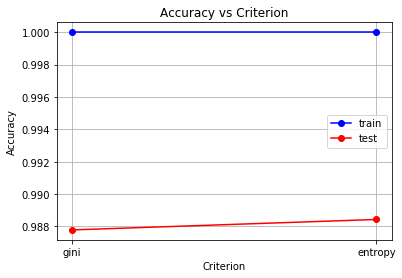

In [85]:
plot_accuracy(metric, metric_acc_train, metric_acc_test, 'Accuracy vs Criterion', 'Criterion', 'Accuracy')

# Decision Tree with various training set sizes

In [75]:
X_train.shape

(120800, 14)

In [80]:
# Experiment for varying train size versus accuracy    
    
metric = ['gini', 'entropy']
train_size = np.arange(5000, len(X_train), 5000)
depth_acc_train = []
depth_acc_test = []
metric_acc_train_size = []
metric_acc_test_size = []
for i in range(len(metric)):
    for j in range(len(train_size)):   
        dtree = DecisionTreeClassifier(criterion=metric[i] ,max_depth=18,  random_state= 5 )
        dtree.fit(X_train.iloc[0:train_size[j]] , y_train.iloc[0:train_size[j]])
        y_pred_train = dtree.predict(X_train.iloc[0:train_size[j]])
        y_pred_test = dtree.predict(X_test)
        depth_acc_train.append(round(accuracy_score(y_train.iloc[0:train_size[j]],y_pred_train),4))
        depth_acc_test.append(round(accuracy_score(y_test,y_pred_test),4))
    
    metric_acc_train_size.append(depth_acc_train)
    metric_acc_test_size.append(depth_acc_test)
    depth_acc_train = []
    depth_acc_test = []

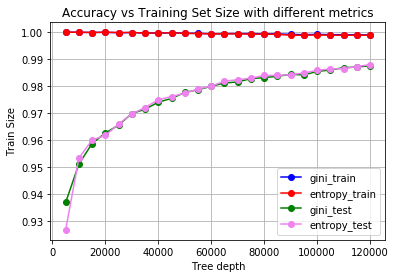

In [81]:
plt.plot(train_size,metric_acc_train_size[0],marker='o',markersize=6,color='blue',label='gini_train')
plt.plot(train_size,metric_acc_train_size[1],marker='o',markersize=6,color='red',label='entropy_train')
plt.plot(train_size,metric_acc_test_size[0],marker='o',markersize=6,color='green',label='gini_test')
plt.plot(train_size,metric_acc_test_size[1],marker='o',markersize=6,color='violet',label='entropy_test')
plt.title('Accuracy vs Training Set Size with different metrics')
plt.xlabel('Tree depth')
plt.grid()
plt.ylabel('Train Size')
plt.legend()
plt.show()

# Overfitting and Pruning :

Pruning Parameters

    max_leaf_nodes
        Reduce the number of leaf nodes
    
    min_samples_leaf
        Restrict the size of sample leaf
        
    max_depth
        Reduce the depth of the tree to build a generalized tree


### Decision Tree with different max depth and different criterion

In [53]:
metric = ['gini', 'entropy']
depth = np.arange(5,20,1)
depth_acc_train = []
depth_acc_test = []
metric_acc_train = []
metric_acc_test = []
for i in range(len(metric)):
    for j in range(len(depth)):   
        dtree = DecisionTreeClassifier(criterion=metric[i] ,max_depth=depth[j],  random_state= 5 )
        #print(depth[j])
        dtree.fit(X_train , y_train)
        y_pred_train = dtree.predict(X_train)
        y_pred_test = dtree.predict(X_test)
        depth_acc_train.append(round(accuracy_score(y_train,y_pred_train),4))
        depth_acc_test.append(round(accuracy_score(y_test,y_pred_test),4))
        #print(depth_acc_train)
        #print(depth_acc_test)
    
    metric_acc_train.append(depth_acc_train)
    metric_acc_test.append(depth_acc_test)
    depth_acc_train = []
    depth_acc_test = []

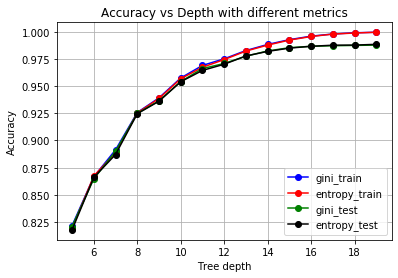

In [55]:
plt.plot(depth,metric_acc_train[0],marker='o',markersize=6,color='blue',label='gini_train')
plt.plot(depth,metric_acc_train[1],marker='o',markersize=6,color='red',label='entropy_train')
plt.plot(depth,metric_acc_test[0],marker='o',markersize=6,color='green',label='gini_test')
plt.plot(depth,metric_acc_test[1],marker='o',markersize=6,color='black',label='entropy_test')
plt.title('Accuracy vs Depth with different metrics')
plt.xlabel('Tree depth')
plt.grid()
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Decision Tree with different max depth and different criterion

In [94]:
dtree = DecisionTreeClassifier(criterion='gini' ,max_depth=None,  random_state= 5 )
dtree.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')